In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("airline_tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Data Visualisation

<Axes: xlabel='airline_sentiment', ylabel='count'>

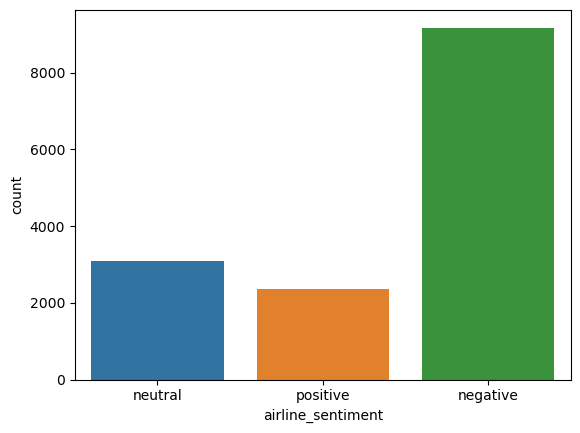

In [4]:
sns.countplot(data=df, x="airline_sentiment")

<Axes: xlabel='negativereason', ylabel='count'>

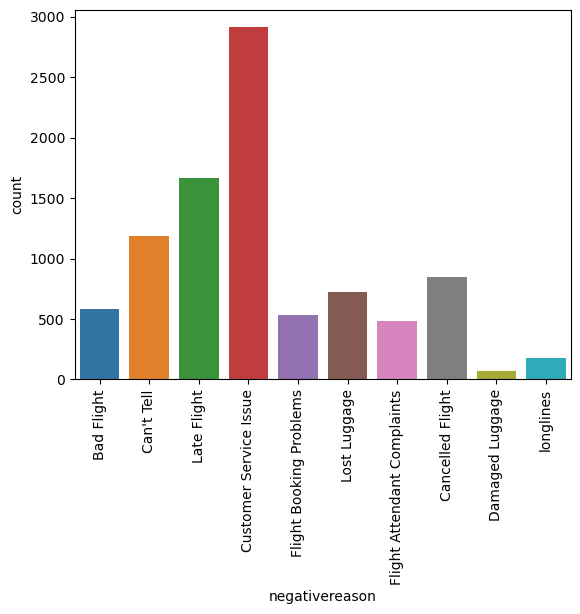

In [5]:
plt.xticks(rotation = 90)
sns.countplot(data=df, x="negativereason")

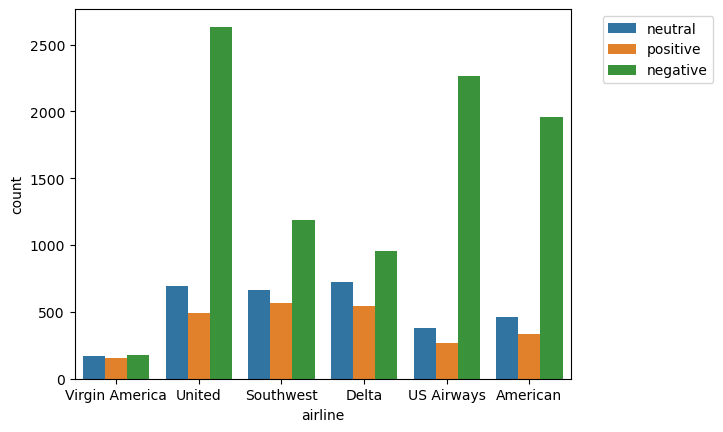

In [6]:
sns.countplot(data = df, x="airline", hue="airline_sentiment")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))


### We can take the required data we need to build the model

In [7]:
data = df[["airline_sentiment", "text"]]

In [8]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [9]:
data.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [10]:
data["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

### we can clean the data 

In [11]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    
    non_punc = [mess for mess in text if mess not in string.punctuation]
    non_punc = "".join(non_punc)

    return [word for word in non_punc.split() if word.lower() not in stopwords.words("english")]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df["text"].head(5).apply(clean_text)

0                      [VirginAmerica, dhepburn, said]
1    [VirginAmerica, plus, youve, added, commercial...
2    [VirginAmerica, didnt, today, Must, mean, need...
3    [VirginAmerica, really, aggressive, blast, obn...
4             [VirginAmerica, really, big, bad, thing]
Name: text, dtype: object

In [13]:
X = data["text"]
y = data["airline_sentiment"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=clean_text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Model Selection

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
bayes = MultinomialNB()
knn = KNeighborsClassifier(n_neighbors=7)
RC = RandomForestClassifier()
log_model = LogisticRegression()

models = [bayes, knn, RC, log_model]

In [17]:
for model in models:
    print(model)
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(confusion_matrix(y_test, y_pred),"\n")
    print(classification_report(y_test, y_pred),"\n")
    print(accuracy_score(y_test, y_pred),"\n")
    

MultinomialNB()
[[1809    8    0]
 [ 534   87    7]
 [ 408   13   62]] 

              precision    recall  f1-score   support

    negative       0.66      1.00      0.79      1817
     neutral       0.81      0.14      0.24       628
    positive       0.90      0.13      0.22       483

    accuracy                           0.67      2928
   macro avg       0.79      0.42      0.42      2928
weighted avg       0.73      0.67      0.58      2928
 

0.6687158469945356 

KNeighborsClassifier(n_neighbors=7)
[[1538  194   85]
 [ 268  289   71]
 [ 119   85  279]] 

              precision    recall  f1-score   support

    negative       0.80      0.85      0.82      1817
     neutral       0.51      0.46      0.48       628
    positive       0.64      0.58      0.61       483

    accuracy                           0.72      2928
   macro avg       0.65      0.63      0.64      2928
weighted avg       0.71      0.72      0.71      2928
 

0.7192622950819673 

RandomForestClassifier()
[

### we can use Logistic regression as our best fitting model

In [18]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

              precision    recall  f1-score   support

    negative       0.80      0.94      0.86      1817
     neutral       0.65      0.48      0.55       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.78      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.78      0.76      2928



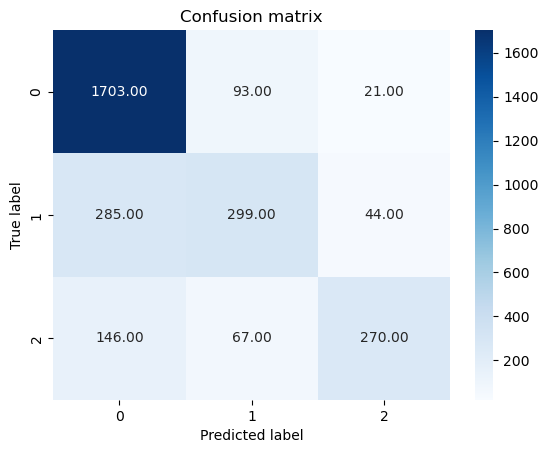

In [19]:
y_preds = model.predict(X_test_tfidf)
print(classification_report(y_test,y_preds))
cm = confusion_matrix(y_test,y_preds)
sns.heatmap(cm, annot=True, fmt=".2f", cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()


### we can make a pipeline for prediction

In [20]:
from sklearn.pipeline import Pipeline

model_pipe = Pipeline([
                    ("tfidf",TfidfVectorizer(analyzer=clean_text)),
                    ("model", LogisticRegression())])

model_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x00000116D65A4540>)),
                ('model', LogisticRegression())])

In [21]:
model_pipe.predict(["bad flight"])

array(['negative'], dtype=object)

In [22]:
model_pipe.predict([" good flight"])

array(['positive'], dtype=object)